In [7]:
# Mengimpor library pandas
import pandas as pd

# Membaca dataset ObesityDataSet.csv
df = pd.read_csv('/content/ObesityDataSet.csv')

In [8]:
# Menampilkan 5 baris pertama dataset
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
# Menampilkan jumlah baris dan kolom dalam dataset
print("Jumlah Baris dan Kolom:", df.shape)

Jumlah Baris dan Kolom: (2111, 17)


In [10]:
# Menampilkan ringkasan informasi dataset (jumlah non-null, tipe data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [11]:
# Menampilkan tipe data masing-masing kolom
df.dtypes

,0
Age,object
Gender,object
Height,object
Weight,object
CALC,object
FAVC,object
FCVC,object
NCP,object
SCC,object
SMOKE,object


In [12]:
# Menampilkan statistik deskriptif semua kolom (termasuk kategorikal)
df.describe(include='all')

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [13]:
# Membuat salinan data yang telah dibersihkan dari duplikat
df_cleaned = df.copy()

# Cek dan hapus duplikat
df_cleaned = df_cleaned.drop_duplicates()

In [14]:
# Cek missing values
df_cleaned.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [15]:
# Konversi kolom numerik ke float
for col in ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Tangani missing values: numerik → median, kategorikal → modus
# Kolom numerik
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in num_cols:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Kolom kategorikal/biner
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
for col in cat_cols:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Pastikan sudah tidak ada missing values
df_cleaned.isnull().sum()

<ipython-input-15-d74b74d6d30c>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
<ipython-input-15-d74b74d6d30c>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [23]:
# Konversi kolom numerik yang masih bertipe object
cols_to_convert = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in cols_to_convert:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')  # jika ada error parse, akan jadi NaN

# Periksa kembali tipe data
print(df_cleaned.dtypes)

Age                               float64
Gender                              int64
Height                            float64
Weight                            float64
CALC                                int64
FAVC                                int64
FCVC                              float64
NCP                               float64
SCC                                 int64
SMOKE                               int64
CH2O                              float64
family_history_with_overweight      int64
FAF                               float64
TUE                               float64
CAEC                                int64
MTRANS                              int64
NObeyesdad                          int64
dtype: object


In [26]:
# Deteksi data outlier
from scipy.stats import zscore
import numpy as np

z_scores = np.abs(zscore(df_cleaned[num_cols]))
outliers = (z_scores > 3).any(axis=1)

print(f"Jumlah data outlier: {outliers.sum()}")

Jumlah data outlier: 0


In [27]:
# Standarisasi data numerik
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

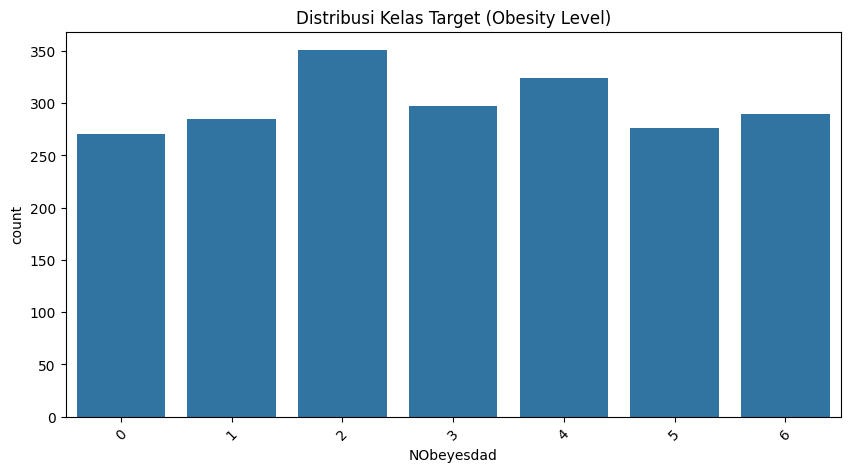

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='NObeyesdad', data=df_cleaned)
plt.title('Distribusi Kelas Target (Obesity Level)')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Memisahkan fitur dan target
X = df_cleaned.drop('NObeyesdad', axis=1)
y = df_cleaned['NObeyesdad']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
print(X_train.isnull().sum().sort_values(ascending=False))
from sklearn.impute import SimpleImputer

# Buat imputer dengan strategi median
imputer = SimpleImputer(strategy='median')

# Imputasi pada X_train dan X_test
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

NCP                               21
Height                            20
Age                               19
Weight                            17
FAF                               16
FCVC                              12
TUE                               12
CH2O                               9
CALC                               0
FAVC                               0
Gender                             0
SCC                                0
family_history_with_overweight     0
SMOKE                              0
CAEC                               0
MTRANS                             0
dtype: int64


In [37]:
# Inisiasi dan latih model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Buat model
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svc = SVC()

# Latih model dengan data yang sudah bebas dari missing values
rf.fit(X_train_imputed, y_train)
knn.fit(X_train_imputed, y_train)
svc.fit(X_train_imputed, y_train)

SVC()

In [39]:
# Evaluasi Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

models = {'Random Forest': rf, 'KNN': knn, 'SVM': svc}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test_imputed)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = [acc, prec, rec, f1]

    print(f"===== {name} =====")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

===== Random Forest =====
Confusion Matrix:
 [[49  4  1  0  0  0  0]
 [ 0 56  0  0  0  1  0]
 [ 0  0 68  0  0  0  2]
 [ 0  0  1 59  0  0  0]
 [ 0  0  1  0 64  0  0]
 [ 0  4  0  0  0 51  0]
 [ 0  1  0  0  0  3 54]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        54
           1       0.86      0.98      0.92        57
           2       0.96      0.97      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.93      0.93      0.93        55
           6       0.96      0.93      0.95        58

    accuracy                           0.96       419
   macro avg       0.96      0.96      0.96       419
weighted avg       0.96      0.96      0.96       419

===== KNN =====
Confusion Matrix:
 [[49  2  2  0  0  1  0]
 [ 9 18 10  3  1 10  6]
 [ 0  1 63  4  1  0  1]
 [ 0  0  1 58  1  0  0]
 [ 0  0  0  1 63  0  1]
 [ 1  6 12

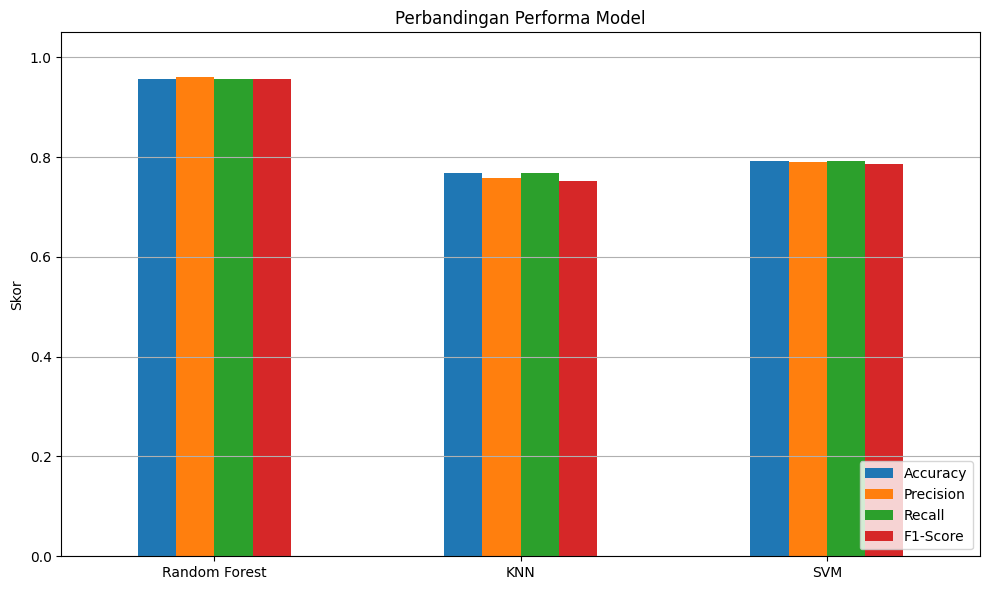

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Buat DataFrame dari hasil evaluasi
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"])

# Transpose agar model jadi sumbu x
results_df = results_df.T

# Plot
results_df.plot(kind="bar", figsize=(10, 6))
plt.title("Perbandingan Performa Model")
plt.ylabel("Skor")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()